# Proyecto Final 
## Analisis Exploratorio (Parte 1)
- Author: Lizette G. (GitHub: LizzyGamboa) (mail: lizzygamboap@gmail.com)
- Creation date: 14 July 2020

Se analizan los datos  de peliculas para una empresa de alquiler, la cual quiere saber información general de su almacén y cuál es el comportamiento de sus clientes respecto a su oferta de películas. El cliente ha compartido una base de datos que contiene información de las siguientes variables: 

* budget	
* company	
* country	
* director	
* genre	
* gross	
* name	
* rating	
* released	
* runtime	
* score	
* star	
* votes	
* writer	
* year

A continuacion, la primera parte del análisis explorario para la empresa: 

In [22]:
library(tidyr)
library(dplyr )
library(tibble)
library(ggplot2)

In [68]:
movies <- read.csv("movies.csv" ); 
# Para saber el tipo de datos y el total de variables
glimpse(movies)

Observations: 6,820
Variables: 15
$ budget   <dbl> 8000000, 6000000, 15000000, 18500000, 9000000, 6000000, 25...
$ company  <fct> "Columbia Pictures Corporation", "Paramount Pictures", "Pa...
$ country  <fct> USA, USA, USA, USA, USA, UK, UK, USA, USA, USA, Australia,...
$ director <fct> Rob Reiner, John Hughes, Tony Scott, James Cameron, Randal...
$ genre    <fct> Adventure, Comedy, Action, Action, Adventure, Drama, Adven...
$ gross    <dbl> 52287414, 70136369, 179800601, 85160248, 18564613, 1385305...
$ name     <fct> Stand by Me, Ferris Bueller's Day Off, Top Gun, Aliens, Fl...
$ rating   <fct> R, PG-13, PG, R, PG, R, PG, R, PG-13, R, PG-13, R, PG-13, ...
$ released <fct> 1986-08-22, 1986-06-11, 1986-05-16, 1986-07-18, 1986-08-01...
$ runtime  <int> 89, 103, 110, 137, 90, 120, 101, 120, 96, 96, 97, 116, 100...
$ score    <dbl> 8.1, 7.8, 6.9, 8.4, 6.9, 8.1, 7.4, 7.8, 6.8, 7.5, 6.5, 7.2...
$ star     <fct> Wil Wheaton, Matthew Broderick, Tom Cruise, Sigourney Weav...
$ votes    <int> 2

Responderemos a las siguientes preguntas: 
###  1. ¿Cuántas peliculas se tienen en total por género? 

In [40]:
movies  %>% group_by(genre) %>% summarise(peliculas=n() ) %>% arrange (peliculas)

genre,peliculas
War,2
Western,2
Musical,4
Sci-Fi,13
Family,14
Romance,15
Thriller,18
Fantasy,32
Mystery,38
Animation,277


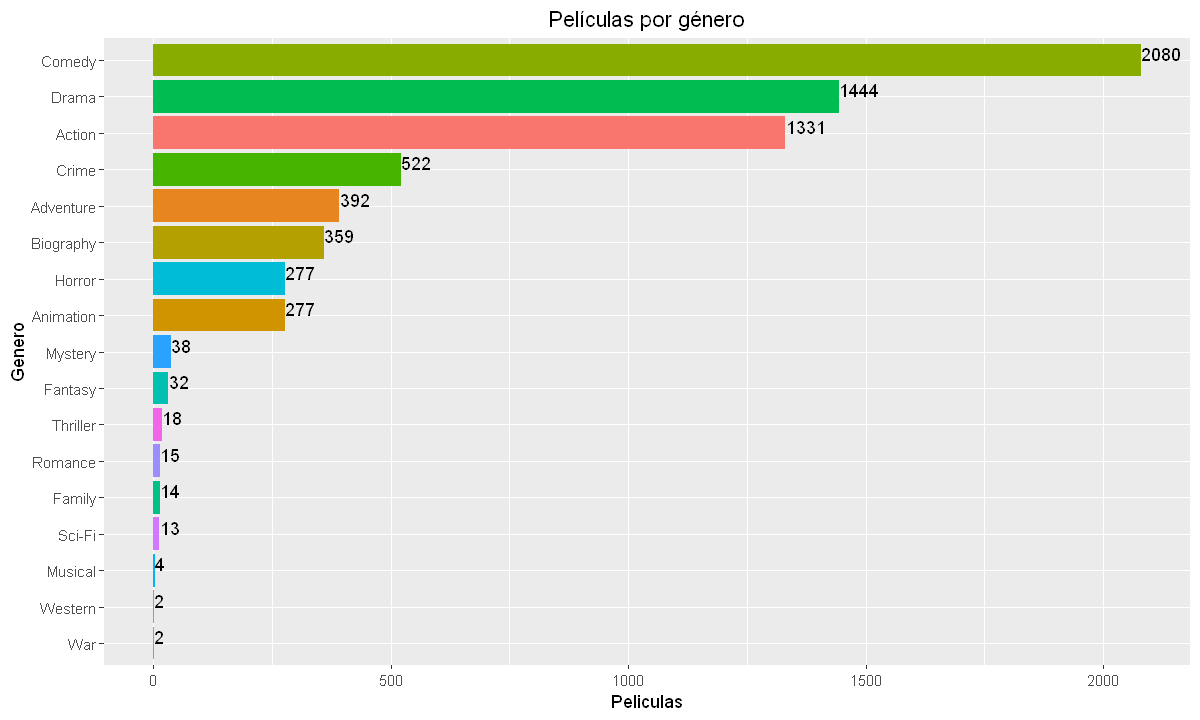

In [79]:
options(repr.plot.width=10, repr.plot.height=6)

table(movies$genre)  %>%  as.data.frame() %>% arrange(Freq)  %>% 
  ggplot(aes(x=reorder(Var1,Freq), y=Freq , fill=as.factor(Var1)) )  +
        geom_bar(stat="identity") +
        ggtitle("Películas por género")+
        coord_flip() +
        geom_text(aes( label=Freq, hjust=-.01, vjust=0)) + 
        xlab("Genero") + 
        ylab("Peliculas") +
        theme(legend.position="none", plot.title = element_text(hjust = 0.5)) 

In [56]:
t1 <-movies  %>% group_by(genre) %>% summarise(peliculas=n() ) %>% arrange (peliculas)  %>% 
    mutate ( genre1= if_else(peliculas<50, "Otros", as.character(genre)))  %>%
    group_by( genre1)  %>% summarise(peliculas1=sum(peliculas) ) 
t1

genre1,peliculas1
Action,1331
Adventure,392
Animation,277
Biography,359
Comedy,2080
Crime,522
Drama,1444
Horror,277
Otros,138


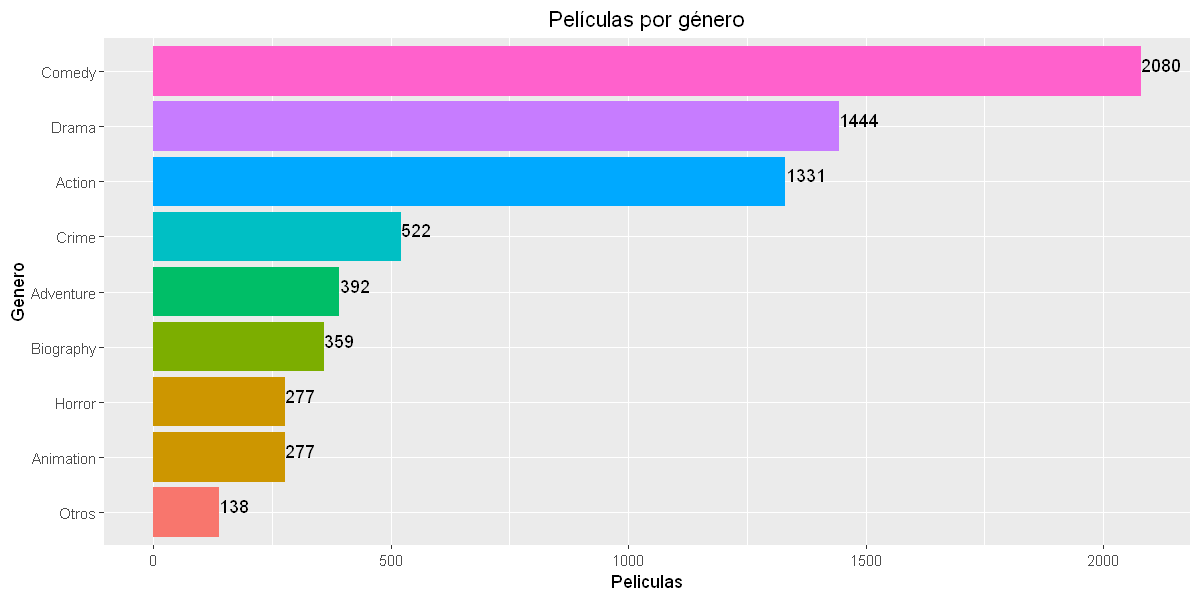

In [80]:
options(repr.plot.width=10, repr.plot.height=5)
t1  %>%  
    ggplot(aes(x=reorder(genre1,peliculas1), y=peliculas1 , fill=as.factor(peliculas1)) )  +
        geom_bar(stat="identity") +
        ggtitle("Películas por género")+
        coord_flip() +
        geom_text(aes( label=peliculas1, hjust=-.01, vjust=0)) + 
        xlab("Genero") + 
        ylab("Peliculas") +
        theme(legend.position="none", plot.title = element_text(hjust = 0.5)) 

Responderemos a las siguientes preguntas: 
###  2. ¿Cuál es la calificación promedio?  

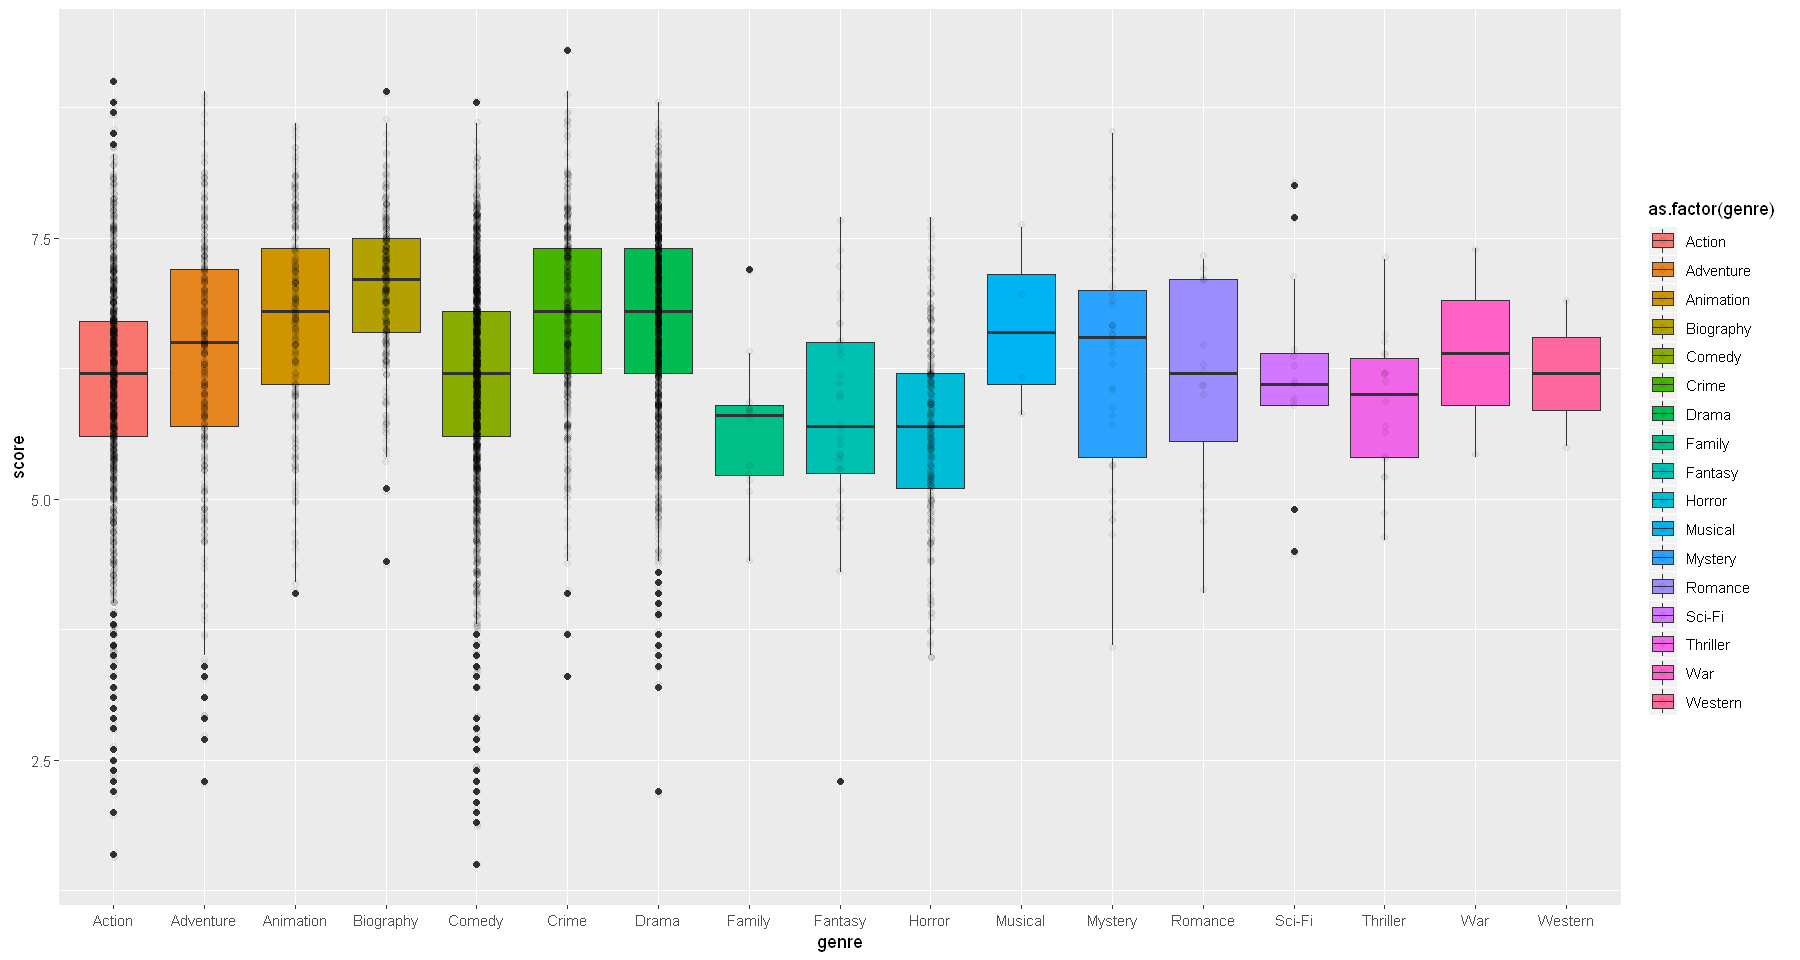

In [70]:
options(repr.plot.width=15, repr.plot.height=8)
# La distribucion de las calificaciones a las peliculas genero? 
movies %>% 
  ggplot(aes(genre,score, fill=as.factor(genre)) )  +
        geom_boxplot() +
        geom_jitter(width=0.005,alpha=0.05)
        

In [ ]:
Intepretación:



In [23]:
table(movies$genre)  %>%  as.data.frame()  %>% arrange(Freq)  %>% mutate(nuevo_genero)

Var1,Freq
War,2
Western,2
Musical,4
Sci-Fi,13
Family,14
Romance,15
Thriller,18
Fantasy,32
Mystery,38
Animation,277


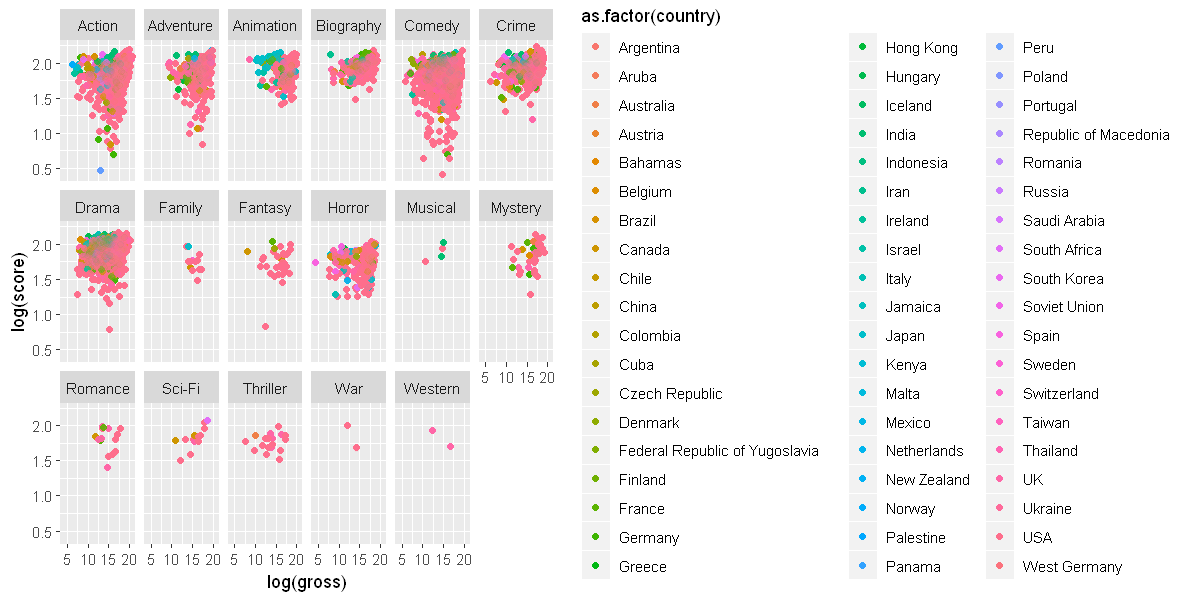

In [94]:
movies %>% 
  ggplot(aes(log(gross),log(score), color=as.factor(country )   ) )  +
        geom_point() +
        geom_jitter(width=0.005,alpha=0.05)+facet_wrap(~genre,nrow=3)

In [ ]:
genre, score, runtime